In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset/winequality-red_(2).csv")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

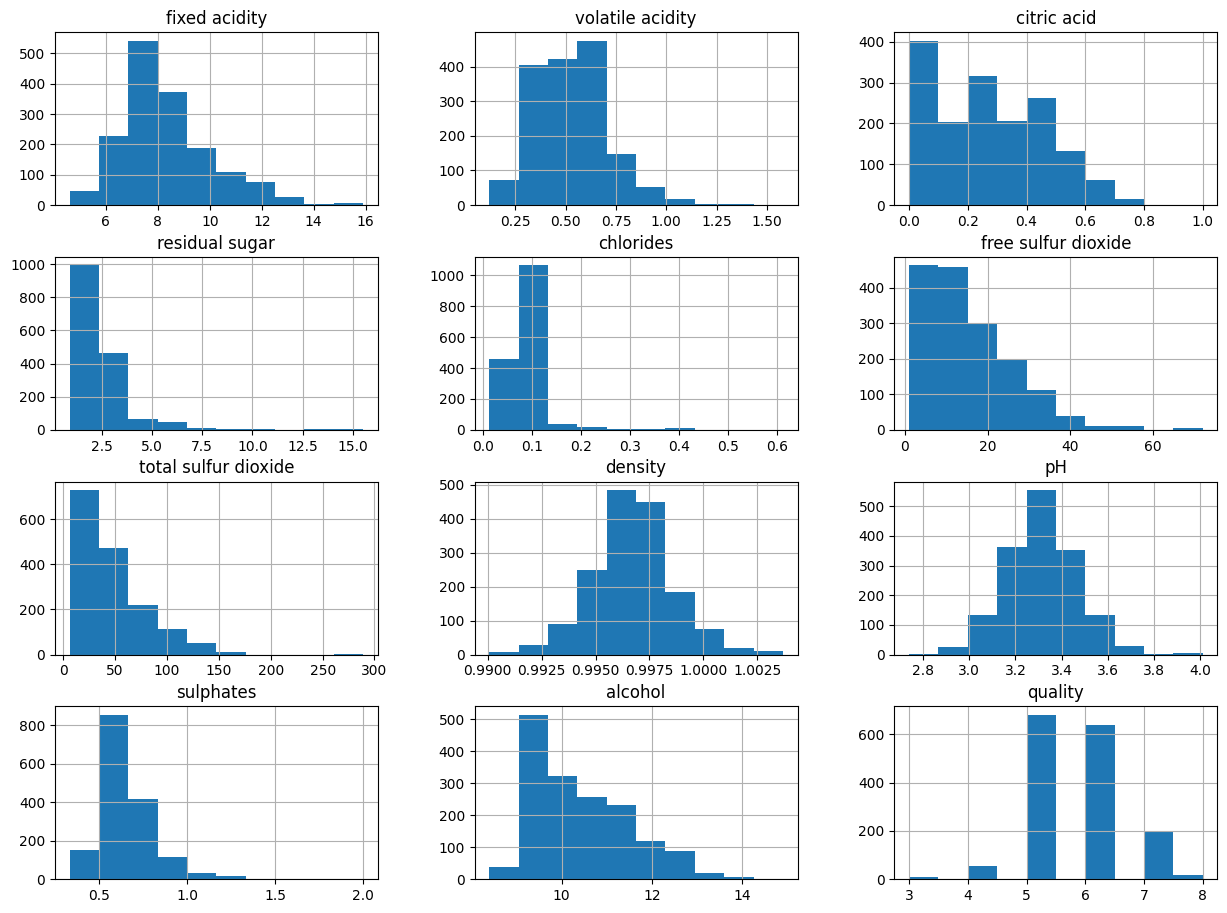

In [ ]:
dgraph = data.select_dtypes(include = ["float","int"])
dgraph.hist(figsize=(15,11))
plt.show()

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data.groupby("quality")["alcohol"].mean()

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

In [ ]:
data.quality.nunique()

6

In [ ]:
data.drop(['fixed acidity','free sulfur dioxide','density'], axis=1, inplace=True)
data.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data.head()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,34.0,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,67.0,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,54.0,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,60.0,3.16,0.58,9.8,6
4,0.70,0.00,1.9,0.076,34.0,3.51,0.56,9.4,5


Text(0.5, 1.0, 'box plot of volatile acidity')

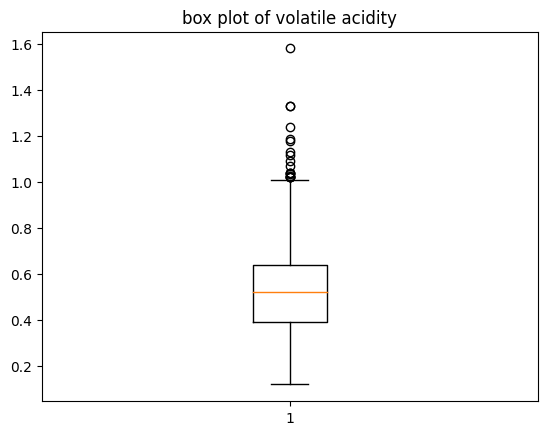

In [ ]:
plt.boxplot(data["volatile acidity"])
plt.title("box plot of volatile acidity")

In [ ]:
q1 = np.percentile(data["volatile acidity"],25, interpolation="midpoint")
q2 = np.percentile(data["volatile acidity"],50, interpolation="midpoint")
q3 = np.percentile(data["volatile acidity"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

0.39
0.52
0.64


<ipython-input-107-6949547ae523>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["volatile acidity"],25, interpolation="midpoint")
<ipython-input-107-6949547ae523>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["volatile acidity"],50, interpolation="midpoint")
<ipython-input-107-6949547ae523>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy

In [ ]:
data["volatile acidity"].median()

0.52

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

0.015000000000000013
1.0150000000000001


In [ ]:
outlier = []
for x in data["volatile acidity"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[1.13,
 1.02,
 1.07,
 1.33,
 1.33,
 1.04,
 1.09,
 1.04,
 1.24,
 1.185,
 1.02,
 1.035,
 1.025,
 1.115,
 1.02,
 1.02,
 1.58,
 1.18,
 1.04]

In [ ]:
ind1 = data["volatile acidity"]>upp_limit
data.loc[ind1].index

Int64Index([  38,   94,  120,  126,  127,  134,  199,  553,  672,  690,  700,
             705,  710,  724,  899, 1261, 1299, 1312, 1467],
           dtype='int64')

In [ ]:
data.drop([38,   94,  120,  126,  127,  134,  199,  553,  672,  690,  700,
             705,  710,  724,  899, 1261, 1299, 1312, 1467],inplace=True)

Text(0.5, 1.0, 'box plot of volatile acidity')

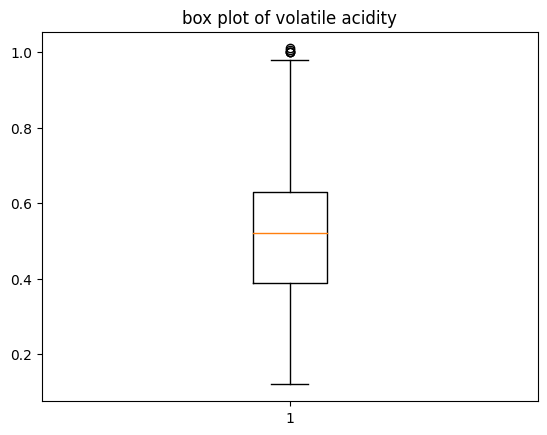

In [ ]:
plt.boxplot(data["volatile acidity"])
plt.title("box plot of volatile acidity")

Text(0.5, 1.0, 'box plot of citric acid')

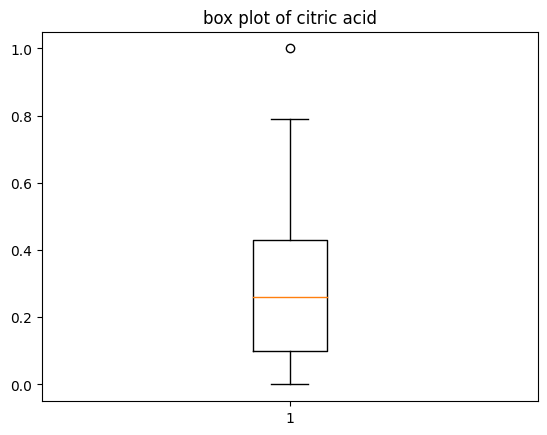

In [ ]:
plt.boxplot(data["citric acid"])
plt.title("box plot of citric acid")

In [ ]:
q1 = np.percentile(data["citric acid"],25, interpolation="midpoint")
q2 = np.percentile(data["citric acid"],50, interpolation="midpoint")
q3 = np.percentile(data["citric acid"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

0.1
0.26
0.43


<ipython-input-115-6f8e3c2a828a>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["citric acid"],25, interpolation="midpoint")
<ipython-input-115-6f8e3c2a828a>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["citric acid"],50, interpolation="midpoint")
<ipython-input-115-6f8e3c2a828a>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

-0.3949999999999999
0.9249999999999999


In [ ]:
outlier = []
for x in data["volatile acidity"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[0.935,
 0.95,
 1.0,
 1.0,
 0.975,
 0.96,
 0.96,
 0.935,
 0.98,
 0.965,
 0.965,
 0.98,
 1.0,
 1.01,
 1.005,
 0.965,
 0.955,
 0.96,
 0.98]

In [ ]:
ind1 = data["volatile acidity"]>upp_limit
data.loc[ind1].index

Int64Index([  46,  160,  234,  239,  261,  422,  424,  633,  684,  735,  736,
             756,  775,  861, 1012, 1040, 1189, 1410, 1469],
           dtype='int64')

In [ ]:
data.drop([46,  160,  234,  239,  261,  422,  424,  633,  684,  735,  736,
             756,  775,  861, 1012, 1040, 1189, 1410, 1469],inplace=True)

Text(0.5, 1.0, 'box plot of citric acid')

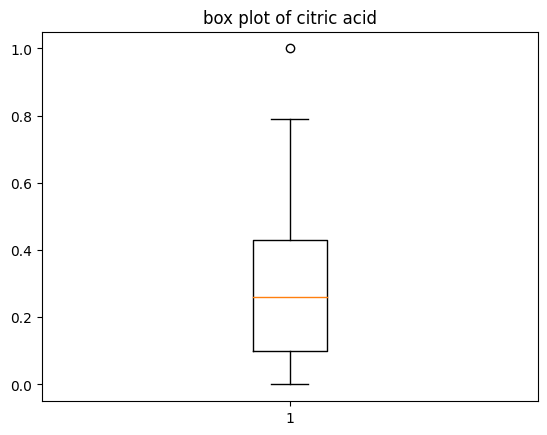

In [ ]:
plt.boxplot(data["citric acid"])
plt.title("box plot of citric acid")

In [ ]:
data.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Text(0.5, 1.0, 'box plot of residual sugar')

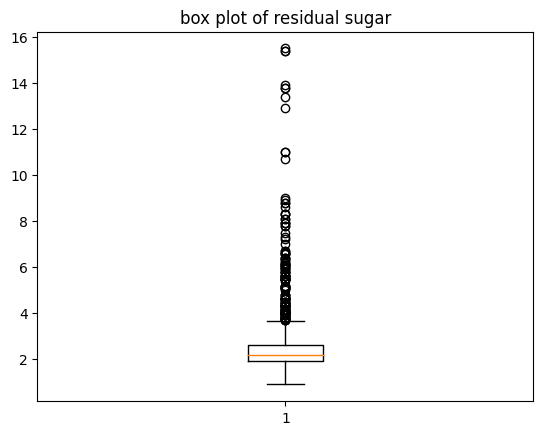

In [ ]:
plt.boxplot(data["residual sugar"])
plt.title("box plot of residual sugar")

In [ ]:
q1 = np.percentile(data["residual sugar"],25, interpolation="midpoint")
q2 = np.percentile(data["residual sugar"],50, interpolation="midpoint")
q3 = np.percentile(data["residual sugar"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

1.9
2.2
2.6


<ipython-input-123-4352bde198b2>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["residual sugar"],25, interpolation="midpoint")
<ipython-input-123-4352bde198b2>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["residual sugar"],50, interpolation="midpoint")
<ipython-input-123-4352bde198b2>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.2

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

0.8499999999999996
3.6500000000000004


In [ ]:
outlier = []
for x in data["residual sugar"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[6.1,
 6.1,
 3.8,
 3.9,
 4.4,
 10.7,
 5.5,
 5.9,
 5.9,
 3.8,
 5.1,
 4.65,
 4.65,
 5.5,
 5.5,
 5.5,
 5.5,
 7.3,
 7.2,
 3.8,
 5.6,
 4.0,
 4.0,
 4.0,
 4.0,
 7.0,
 4.0,
 4.0,
 6.4,
 5.6,
 5.6,
 11.0,
 11.0,
 4.5,
 4.8,
 5.8,
 5.8,
 3.8,
 4.4,
 6.2,
 4.2,
 7.9,
 7.9,
 3.7,
 4.5,
 6.7,
 6.6,
 3.7,
 5.2,
 15.5,
 4.1,
 8.3,
 6.55,
 6.55,
 4.6,
 6.1,
 4.3,
 5.8,
 5.15,
 6.3,
 4.2,
 4.2,
 4.6,
 4.2,
 4.6,
 4.3,
 4.3,
 7.9,
 4.6,
 5.1,
 5.6,
 5.6,
 6.0,
 8.6,
 7.5,
 4.4,
 3.9,
 4.2,
 4.0,
 4.0,
 4.0,
 6.6,
 6.0,
 6.0,
 3.8,
 9.0,
 4.6,
 8.8,
 8.8,
 5.0,
 3.8,
 4.1,
 5.9,
 4.1,
 6.2,
 8.9,
 4.0,
 3.9,
 4.0,
 8.1,
 8.1,
 6.4,
 6.4,
 8.3,
 8.3,
 4.7,
 5.5,
 5.5,
 4.3,
 5.5,
 3.7,
 6.2,
 5.6,
 7.8,
 4.6,
 5.8,
 4.1,
 12.9,
 4.3,
 13.4,
 4.8,
 6.3,
 4.5,
 4.5,
 4.3,
 4.3,
 3.9,
 3.8,
 5.4,
 3.8,
 6.1,
 3.9,
 5.1,
 5.1,
 3.9,
 15.4,
 15.4,
 4.8,
 5.2,
 5.2,
 3.75,
 13.8,
 13.8,
 5.7,
 4.3,
 4.1,
 4.1,
 4.4,
 3.7,
 6.7,
 13.9,
 5.1,
 7.8]

In [ ]:
ind1 = data["residual sugar"]>upp_limit
a = data.loc[ind1].index
a

Int64Index([   9,   11,   14,   15,   18,   33,   35,   39,   40,   55,
            ...
            1478, 1501, 1514, 1515, 1540, 1552, 1558, 1574, 1577, 1589],
           dtype='int64', length=153)

In [ ]:
b=slice(0,50)
print(a[b])

Int64Index([  9,  11,  14,  15,  18,  33,  35,  39,  40,  55,  57,  64,  65,
            154, 155, 156, 157, 163, 164, 192, 215, 269, 270, 271, 272, 274,
            275, 277, 278, 279, 283, 324, 325, 327, 353, 364, 366, 374, 375,
            378, 395, 396, 400, 408, 409, 413, 415, 442, 455, 480],
           dtype='int64')


In [ ]:
data.drop([ 9,  11,  14,  15,  18,  33,  35,  39,  40,  55,  57,  64,  65,
            154, 155, 156, 157, 163, 164, 192, 215, 269, 270, 271, 272, 274,
            275, 277, 278, 279, 283, 324, 325, 327, 353, 364, 366, 374, 375,
            378, 395, 396, 400, 408, 409, 413, 415, 442, 455, 480],inplace=True)

In [ ]:
b=slice(50,100)
print(a[b])

Int64Index([ 484,  494,  501,  502,  510,  515,  516,  538,  539,  541,  554,
             555,  556,  557,  558,  559,  564,  595,  606,  608,  624,  625,
             645,  649,  652,  659,  719,  740,  800,  878,  884,  889,  903,
             904,  910,  911,  913,  917,  923,  941,  944,  946,  974, 1032,
            1038, 1043, 1056, 1057, 1059, 1071],
           dtype='int64')


In [ ]:
data.drop([484,  494,  501,  502,  510,  515,  516,  538,  539,  541,  554,
             555,  556,  557,  558,  559,  564,  595,  606,  608,  624,  625,
             645,  649,  652,  659,  719,  740,  800,  878,  884,  889,  903,
             904,  910,  911,  913,  917,  923,  941,  944,  946,  974, 1032,
            1038, 1043, 1056, 1057, 1059, 1071],inplace=True)

In [ ]:
b=slice(100,154)
print(a[b])

Int64Index([1074, 1077, 1078, 1079, 1081, 1086, 1094, 1096, 1114, 1133, 1138,
            1147, 1176, 1186, 1190, 1203, 1226, 1235, 1239, 1244, 1257, 1276,
            1288, 1289, 1295, 1296, 1307, 1331, 1358, 1373, 1388, 1394, 1406,
            1412, 1423, 1434, 1435, 1437, 1441, 1445, 1471, 1474, 1476, 1478,
            1501, 1514, 1515, 1540, 1552, 1558, 1574, 1577, 1589],
           dtype='int64')


In [ ]:
data.drop([1074, 1077, 1078, 1079, 1081, 1086, 1094, 1096, 1114, 1133, 1138,
            1147, 1176, 1186, 1190, 1203, 1226, 1235, 1239, 1244, 1257, 1276,
            1288, 1289, 1295, 1296, 1307, 1331, 1358, 1373, 1388, 1394, 1406,
            1412, 1423, 1434, 1435, 1437, 1441, 1445, 1471, 1474, 1476, 1478,
            1501, 1514, 1515, 1540, 1552, 1558, 1574, 1577, 1589],inplace=True)

In [ ]:
outlier = []
for x in data["residual sugar"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[]

Text(0.5, 1.0, 'box plot of residual sugar')

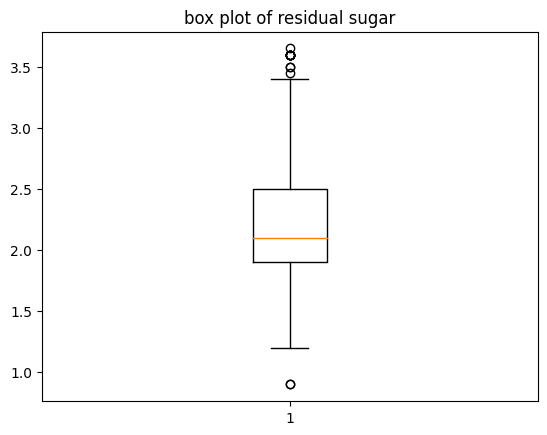

In [ ]:
plt.boxplot(data["residual sugar"])
plt.title("box plot of residual sugar")

Text(0.5, 1.0, 'box plot of chlorides')

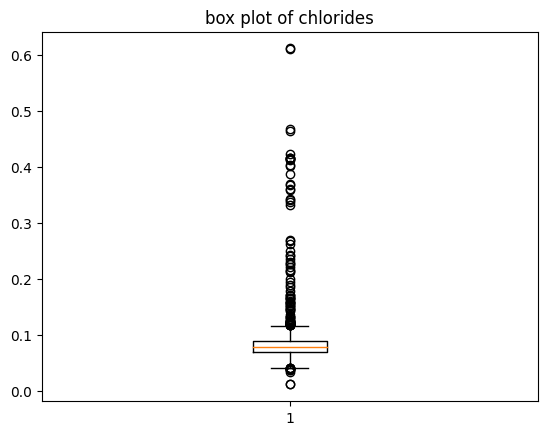

In [ ]:

plt.boxplot(data["chlorides"])
plt.title("box plot of chlorides")

In [ ]:
q1 = np.percentile(data["chlorides"],25, interpolation="midpoint")
q2 = np.percentile(data["chlorides"],50, interpolation="midpoint")
q3 = np.percentile(data["chlorides"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

0.07
0.079
0.089


<ipython-input-136-0166010f3f16>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["chlorides"],25, interpolation="midpoint")
<ipython-input-136-0166010f3f16>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["chlorides"],50, interpolation="midpoint")
<ipython-input-136-0166010f3f16>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = 

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

0.04150000000000002
0.11749999999999998


In [ ]:
outlier = []
for x in data["chlorides"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[0.368,
 0.341,
 0.332,
 0.4639999999999999,
 0.401,
 0.467,
 0.122,
 0.119,
 0.119,
 0.146,
 0.118,
 0.236,
 0.61,
 0.36,
 0.27,
 0.039,
 0.337,
 0.263,
 0.611,
 0.358,
 0.3429999999999999,
 0.186,
 0.213,
 0.214,
 0.121,
 0.122,
 0.122,
 0.128,
 0.118,
 0.118,
 0.159,
 0.121,
 0.127,
 0.413,
 0.152,
 0.152,
 0.125,
 0.2,
 0.171,
 0.226,
 0.226,
 0.25,
 0.148,
 0.122,
 0.143,
 0.222,
 0.039,
 0.157,
 0.422,
 0.034,
 0.387,
 0.415,
 0.157,
 0.157,
 0.243,
 0.241,
 0.19,
 0.132,
 0.126,
 0.038,
 0.0409999999999999,
 0.165,
 0.145,
 0.147,
 0.012,
 0.012,
 0.119,
 0.1939999999999999,
 0.161,
 0.12,
 0.12,
 0.123,
 0.123,
 0.414,
 0.216,
 0.171,
 0.178,
 0.118,
 0.118,
 0.369,
 0.0409999999999999,
 0.166,
 0.166,
 0.136,
 0.132,
 0.132,
 0.123,
 0.123,
 0.123,
 0.4029999999999999,
 0.0409999999999999,
 0.414,
 0.0409999999999999,
 0.166,
 0.415,
 0.153,
 0.415,
 0.267,
 0.1689999999999999,
 0.039,
 0.23,
 0.038,
 0.118]

In [ ]:
ind1 = data["chlorides"]>upp_limit
a = data.loc[ind1].index
a

Int64Index([  17,   19,   42,   81,   83,  106,  109,  118,  121,  125,  130,
             147,  151,  169,  181,  226,  240,  258,  281,  291,  303,  307,
             308,  326,  330,  331,  335,  342,  343,  368,  418,  447,  451,
             482,  483,  512,  517,  549,  566,  567,  568,  614,  618,  638,
             666,  689,  692,  730,  754,  773,  774,  776,  777,  780,  795,
             796,  808,  832,  833,  842,  882,  916,  958, 1014, 1020, 1021,
            1051, 1098, 1109, 1146, 1152, 1155, 1165, 1191, 1193, 1207, 1220,
            1221, 1252, 1258, 1259, 1260, 1319, 1334, 1370, 1371, 1372, 1374,
            1436, 1570, 1578],
           dtype='int64')

In [ ]:
ind1 = data["chlorides"]<low_limit
a = data.loc[ind1].index
a

Int64Index([210, 688, 695, 797, 806, 836, 837, 1178, 1316, 1321, 1490, 1571], dtype='int64')

In [ ]:
data.drop([ 17,   19,   42,   81,   83,  106,  109,  118,  121,  125,  130,
             147,  151,  169,  181,  226,  240,  258,  281,  291,  303,  307,
             308,  326,  330,  331,  335,  342,  343,  368,  418,  447,  451,
             482,  483,  512,  517,  549,  566,  567,  568,  614,  618,  638,
             666,  689,  692,  730,  754,  773,  774,  776,  777,  780,  795,
             796,  808,  832,  833,  842,  882,  916,  958, 1014, 1020, 1021,
            1051, 1098, 1109, 1146, 1152, 1155, 1165, 1191, 1193, 1207, 1220,
            1221, 1252, 1258, 1259, 1260, 1319, 1334, 1370, 1371, 1372, 1374,
            1436, 1570, 1578],inplace=True)

In [ ]:
data.drop([210, 688, 695, 797, 806, 836, 837, 1178, 1316, 1321, 1490, 1571],inplace=True)

In [ ]:
outlier = []
for x in data["chlorides"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[]

Text(0.5, 1.0, 'box plot of chlorides')

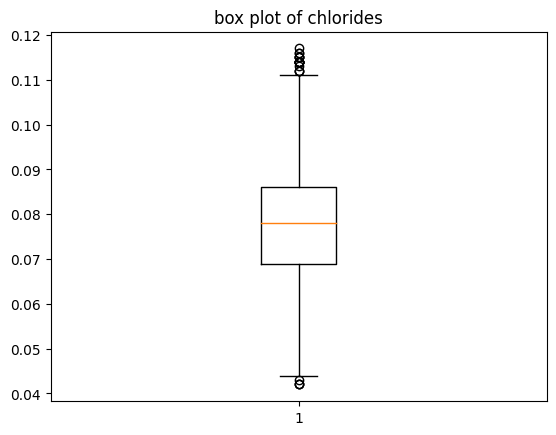

In [ ]:
plt.boxplot(data["chlorides"])
plt.title("box plot of chlorides")

In [ ]:
data.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Text(0.5, 1.0, 'box plot of total sulfur dioxide')

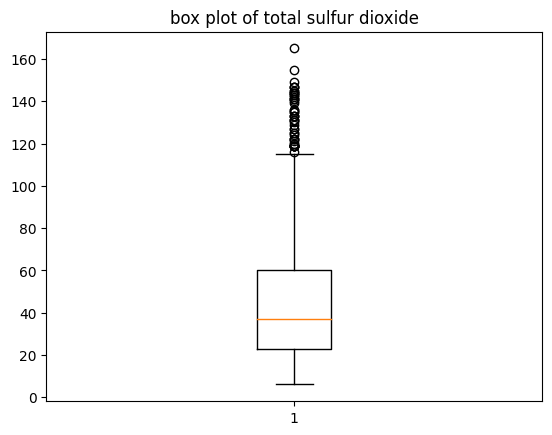

In [ ]:
plt.boxplot(data["total sulfur dioxide"])
plt.title("box plot of total sulfur dioxide")

In [ ]:
q1 = np.percentile(data["total sulfur dioxide"],25, interpolation="midpoint")
q2 = np.percentile(data["total sulfur dioxide"],50, interpolation="midpoint")
q3 = np.percentile(data["total sulfur dioxide"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

23.0
37.0
60.0


<ipython-input-147-91d469dd36f7>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["total sulfur dioxide"],25, interpolation="midpoint")
<ipython-input-147-91d469dd36f7>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["total sulfur dioxide"],50, interpolation="midpoint")
<ipython-input-147-91d469dd36f7>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecat

In [ ]:
data["total sulfur dioxide"].median()

37.0

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

-32.5
115.5


In [ ]:
outlier = []
for x in data["total sulfur dioxide"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[119.0,
 119.0,
 136.0,
 125.0,
 140.0,
 136.0,
 133.0,
 141.0,
 143.0,
 144.0,
 127.0,
 120.0,
 145.0,
 120.0,
 144.0,
 119.0,
 135.0,
 165.0,
 122.0,
 124.0,
 129.0,
 133.0,
 142.0,
 116.0,
 121.0,
 149.0,
 147.0,
 145.0,
 155.0,
 122.0,
 125.0,
 127.0,
 139.0,
 143.0,
 144.0,
 119.0,
 130.0,
 122.0,
 119.0,
 135.0,
 119.0,
 119.0,
 141.0,
 141.0,
 133.0,
 147.0,
 147.0,
 131.0,
 131.0,
 131.0]

In [ ]:
ind1 = data["total sulfur dioxide"]>upp_limit
a=data.loc[ind1].index
a

Int64Index([  53,   79,   86,   88,   90,   91,   92,  145,  188,  189,  190,
             195,  201,  207,  219,  255,  313,  354,  414,  417,  463,  522,
             523,  524,  561,  591,  636,  637,  651,  693,  694,  723,  741,
             771,  772,  789,  791,  852,  977, 1131, 1184, 1188, 1400, 1401,
            1419, 1493, 1496, 1559, 1560, 1561],
           dtype='int64')

In [ ]:
data.drop([53,   79,   86,   88,   90,   91,   92,  145,  188,  189,  190,
             195,  201,  207,  219,  255,  313,  354,  414,  417,  463,  522,
             523,  524,  561,  591,  636,  637,  651,  693,  694,  723,  741,
             771,  772,  789,  791,  852,  977, 1131, 1184, 1188, 1400, 1401,
            1419, 1493, 1496, 1559, 1560, 1561],inplace=True)

In [ ]:
outlier = []
for x in data["total sulfur dioxide"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[]

Text(0.5, 1.0, 'box plot of total sulfur dioxide')

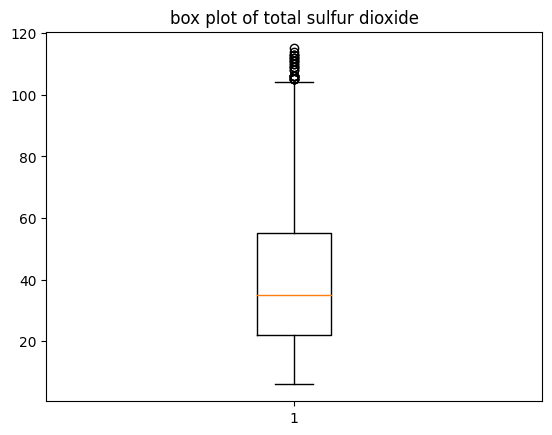

In [ ]:
plt.boxplot(data["total sulfur dioxide"])
plt.title("box plot of total sulfur dioxide")

Text(0.5, 1.0, 'box plot of pH')

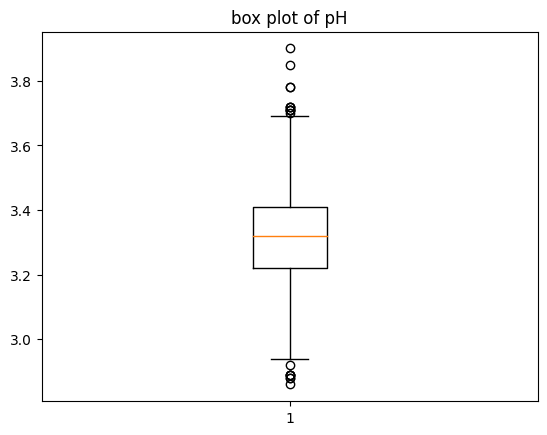

In [ ]:
plt.boxplot(data["pH"])
plt.title("box plot of pH")

In [ ]:
q1 = np.percentile(data["pH"],25, interpolation="midpoint")
q2 = np.percentile(data["pH"],50, interpolation="midpoint")
q3 = np.percentile(data["pH"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

3.22
3.32
3.41


<ipython-input-156-9b00d2052bf6>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["pH"],25, interpolation="midpoint")
<ipython-input-156-9b00d2052bf6>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["pH"],50, interpolation="midpoint")
<ipython-input-156-9b00d2052bf6>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np.percentile(

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

2.9350000000000005
3.6950000000000003


In [ ]:
outlier = []
for x in data["pH"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[3.9,
 3.85,
 2.88,
 2.86,
 3.72,
 2.89,
 2.89,
 2.92,
 3.71,
 3.71,
 3.71,
 2.89,
 2.89,
 3.78,
 3.7,
 3.78,
 3.71,
 2.88,
 3.72,
 3.72]

In [ ]:
ind1 = data["pH"]>upp_limit
a=data.loc[ind1].index
a

Int64Index([45, 95, 588, 821, 996, 997, 1111, 1270, 1300, 1377, 1488, 1491], dtype='int64')

In [ ]:
data.drop([45, 95, 588, 821, 996, 997, 1111, 1270, 1300, 1377, 1488, 1491],inplace=True)

In [ ]:
ind1 = data["pH"]<low_limit
a=data.loc[ind1].index
a

Int64Index([440, 544, 650, 656, 657, 1017, 1018, 1470], dtype='int64')

In [ ]:
data.drop([440, 544, 650, 656, 657, 1017, 1018, 1470],inplace=True)

In [ ]:
outlier = []
for x in data["pH"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[]

Text(0.5, 1.0, 'box plot of pH')

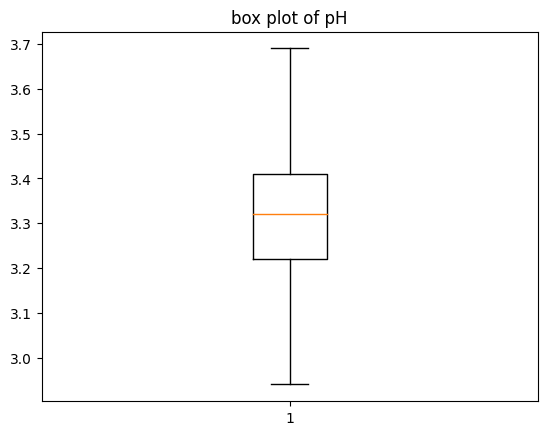

In [ ]:
plt.boxplot(data["pH"])
plt.title("box plot of pH")

In [ ]:
data.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Text(0.5, 1.0, 'box plot of sulphates')

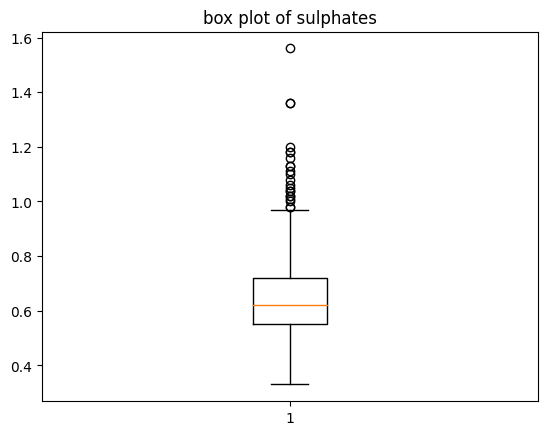

In [ ]:
plt.boxplot(data["sulphates"])
plt.title("box plot of sulphates")

In [ ]:
q1 = np.percentile(data["sulphates"],25, interpolation="midpoint")
q2 = np.percentile(data["sulphates"],50, interpolation="midpoint")
q3 = np.percentile(data["sulphates"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

0.55
0.62
0.72


<ipython-input-167-002799064f67>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["sulphates"],25, interpolation="midpoint")
<ipython-input-167-002799064f67>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["sulphates"],50, interpolation="midpoint")
<ipython-input-167-002799064f67>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = 

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

0.29500000000000015
0.9749999999999999


In [ ]:
outlier = []

for x in data["sulphates"]:
  if ((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
outlier

[1.56,
 1.2,
 1.08,
 1.0,
 1.36,
 1.18,
 0.98,
 1.13,
 1.04,
 1.11,
 1.13,
 1.06,
 1.04,
 1.05,
 1.02,
 1.02,
 1.36,
 1.16,
 0.98,
 1.18,
 1.1,
 1.01]

In [ ]:
ind1 = data["sulphates"]>upp_limit
data.loc[ind1].index

Int64Index([  13,   43,  161,  338,  339,  340,  350,  369,  372,  376,  377,
             477,  503,  504,  506,  586,  639, 1158, 1166, 1367, 1403, 1408],
           dtype='int64')

In [ ]:
data.drop([13,   43,  161,  338,  339,  340,  350,  369,  372,  376,  377,
             477,  503,  504,  506,  586,  639, 1158, 1166, 1367, 1403, 1408], inplace=True)

In [ ]:
ind1 = data["sulphates"]<low_limit
data.loc[ind1].index

Int64Index([], dtype='int64')

In [ ]:
outlier = []

for x in data["sulphates"]:
  if ((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
outlier

[]

Text(0.5, 1.0, 'box plot of sulphates')

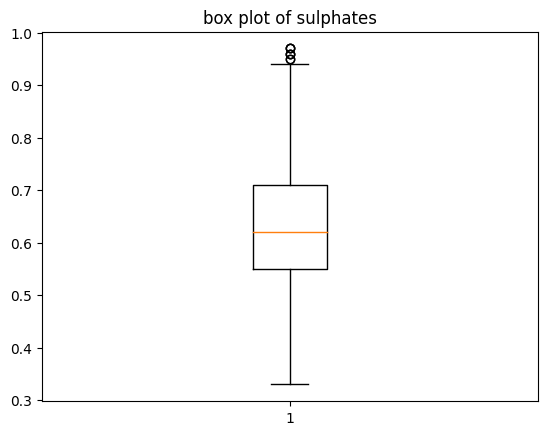

In [ ]:
plt.boxplot(data["sulphates"])
plt.title("box plot of sulphates")

In [ ]:
data.shape

(1213, 9)

<Axes: >

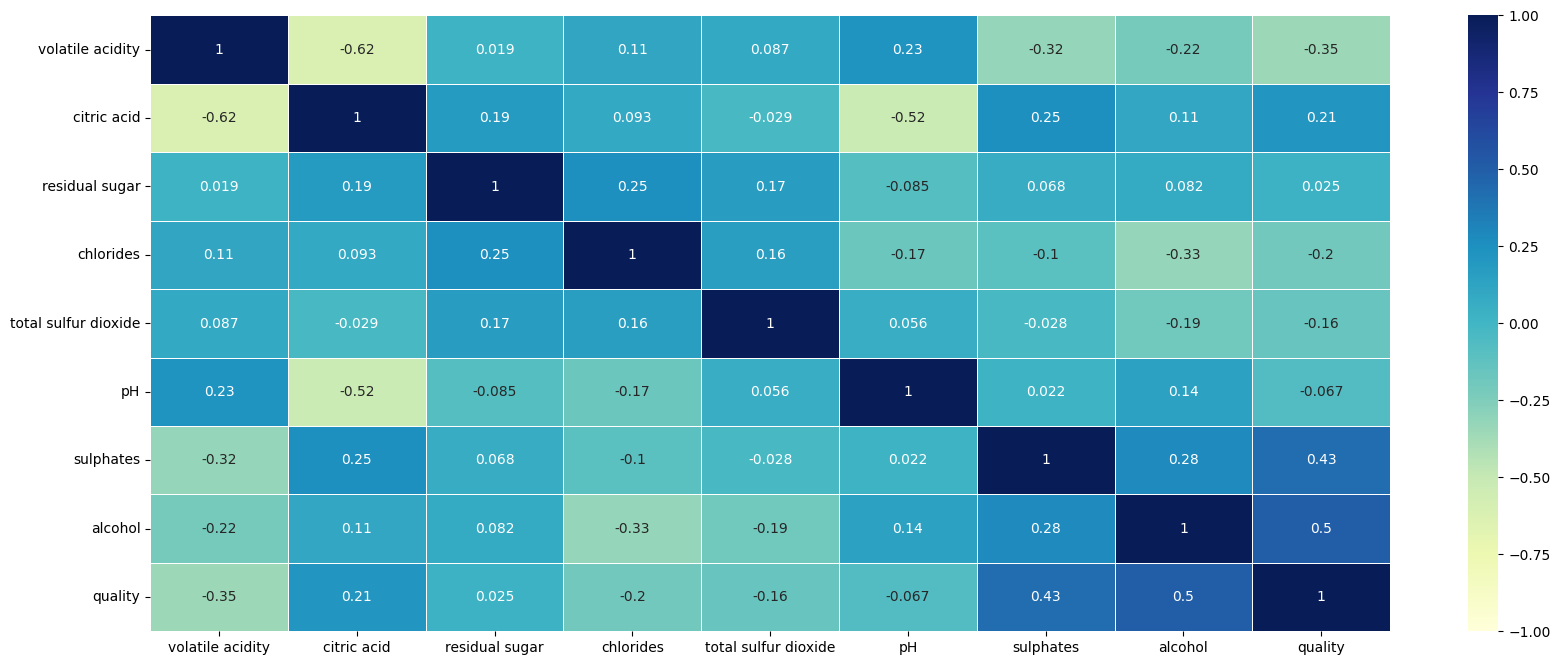

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-1, vmax=1, annot=True, linewidth=0.5, cmap="YlGnBu")

In [ ]:
data.columns
y = data["quality"]
x = data.drop("quality", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE IS:", mean_squared_error(y_test,prediction))

MSE IS: 0.350925212874037


In [ ]:
from sklearn.metrics import r2_score
print("R squared value is :", r2_score(y_test,prediction))

R squared value is : 0.34886303120289675


In [ ]:
x.describe()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.512049,0.255581,2.189613,0.077916,41.650453,3.322745,0.637692,10.405771
std,0.157790,0.186662,0.444636,0.013747,25.150829,0.138489,0.117961,1.018655
min,0.120000,0.000000,1.200000,0.042000,6.000000,2.940000,0.330000,8.700000
25%,0.390000,0.090000,1.900000,0.069000,22.000000,3.220000,0.550000,9.500000
50%,0.510000,0.240000,2.100000,0.078000,36.000000,3.330000,0.620000,10.200000
75%,0.620000,0.400000,2.500000,0.086000,55.000000,3.410000,0.710000,11.000000
max,0.920000,0.750000,3.600000,0.116000,115.000000,3.690000,0.970000,14.000000


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
from sklearn import preprocessing
standard = preprocessing.StandardScaler()
x = standard.fit_transform(x)

In [ ]:
x.describe()

AttributeError: ignored

In [ ]:
x= pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7
count,1.213000e+03,1.213000e+03,1.213000e+03,1213.000000,1.213000e+03,1.213000e+03,1.213000e+03,1.213000e+03
mean,-2.460247e-16,-1.757319e-16,2.577402e-16,0.000000,-8.200823e-17,3.163175e-16,2.401670e-16,-9.840988e-16
std,1.000412e+00,1.000412e+00,1.000412e+00,1.000412,1.000412e+00,1.000412e+00,1.000412e+00,1.000412e+00
min,-2.485654e+00,-1.369785e+00,-2.226586e+00,-2.613773,-1.418051e+00,-2.764853e+00,-2.609494e+00,-1.675224e+00
25%,-7.738089e-01,-8.874306e-01,-6.516157e-01,-0.648854,-7.816267e-01,-7.422053e-01,-7.437020e-01,-8.895501e-01
50%,-1.298872e-02,-8.350729e-02,-2.016243e-01,0.006120,-2.247554e-01,5.240638e-02,-1.500409e-01,-2.020858e-01
75%,6.844297e-01,7.740109e-01,6.983584e-01,0.588318,5.309985e-01,6.303058e-01,6.132378e-01,5.835876e-01
max,2.586480e+00,2.649832e+00,3.173311e+00,2.771562,2.917590e+00,2.652954e+00,2.818265e+00,3.529863e+00


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)

print("MSE IS:", mean_squared_error(y_test,prediction))
print("R squared value is:", r2_score(y_test,prediction))

# standard scalar not done any effet on the dataset

MSE IS: 0.350925212874037
R squared value is: 0.34886303120289675


In [ ]:
x = data.drop("quality",axis=1)
x.describe()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.512049,0.255581,2.189613,0.077916,41.650453,3.322745,0.637692,10.405771
std,0.157790,0.186662,0.444636,0.013747,25.150829,0.138489,0.117961,1.018655
min,0.120000,0.000000,1.200000,0.042000,6.000000,2.940000,0.330000,8.700000
25%,0.390000,0.090000,1.900000,0.069000,22.000000,3.220000,0.550000,9.500000
50%,0.510000,0.240000,2.100000,0.078000,36.000000,3.330000,0.620000,10.200000
75%,0.620000,0.400000,2.500000,0.086000,55.000000,3.410000,0.710000,11.000000
max,0.920000,0.750000,3.600000,0.116000,115.000000,3.690000,0.970000,14.000000


In [ ]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.490061,0.340775,0.412339,0.485350,0.327068,0.510327,0.480768,0.321844
std,0.197237,0.248883,0.185265,0.185766,0.230742,0.184653,0.184314,0.192199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.337500,0.120000,0.291667,0.364865,0.146789,0.373333,0.343750,0.150943
50%,0.487500,0.320000,0.375000,0.486486,0.275229,0.520000,0.453125,0.283019
75%,0.625000,0.533333,0.541667,0.594595,0.449541,0.626667,0.593750,0.433962
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)

print("MSE IS:", mean_squared_error(y_test,prediction))
print("R squared value is:", r2_score(y_test,prediction))

# minmax scalar not done any effect on the dataset

MSE IS: 0.3509252128740369
R squared value is: 0.34886303120289697


In [ ]:
x = data.drop("quality",axis=1)
x.describe()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.512049,0.255581,2.189613,0.077916,41.650453,3.322745,0.637692,10.405771
std,0.157790,0.186662,0.444636,0.013747,25.150829,0.138489,0.117961,1.018655
min,0.120000,0.000000,1.200000,0.042000,6.000000,2.940000,0.330000,8.700000
25%,0.390000,0.090000,1.900000,0.069000,22.000000,3.220000,0.550000,9.500000
50%,0.510000,0.240000,2.100000,0.078000,36.000000,3.330000,0.620000,10.200000
75%,0.620000,0.400000,2.500000,0.086000,55.000000,3.410000,0.710000,11.000000
max,0.920000,0.750000,3.600000,0.116000,115.000000,3.690000,0.970000,14.000000


In [ ]:
x = preprocessing.normalize(x)


In [ ]:
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.015396,0.007920,0.065248,0.002331,0.916178,0.100732,0.019297,0.318721
std,0.009693,0.008256,0.034719,0.001242,0.096514,0.052359,0.010465,0.174509
min,0.002025,0.000000,0.012768,0.000412,0.430933,0.027592,0.004231,0.081100
25%,0.008239,0.002035,0.037646,0.001367,0.891396,0.058985,0.011259,0.179690
50%,0.013036,0.004988,0.056863,0.002077,0.953919,0.089147,0.016748,0.279090
75%,0.019802,0.011100,0.085375,0.003039,0.980835,0.133849,0.026276,0.425162
max,0.069482,0.042967,0.232493,0.007990,0.996124,0.263794,0.056805,0.854685


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.2)
lr= linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)

print("MSE IS:", mean_squared_error(y_test,prediction))
print("R squared value is:", r2_score(y_test,prediction))

MSE IS: 0.3796129715430898
R squared value is: 0.29563328441905745


In [ ]:
x = data.drop("quality",axis=1)
x.describe()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.512049,0.255581,2.189613,0.077916,41.650453,3.322745,0.637692,10.405771
std,0.157790,0.186662,0.444636,0.013747,25.150829,0.138489,0.117961,1.018655
min,0.120000,0.000000,1.200000,0.042000,6.000000,2.940000,0.330000,8.700000
25%,0.390000,0.090000,1.900000,0.069000,22.000000,3.220000,0.550000,9.500000
50%,0.510000,0.240000,2.100000,0.078000,36.000000,3.330000,0.620000,10.200000
75%,0.620000,0.400000,2.500000,0.086000,55.000000,3.410000,0.710000,11.000000
max,0.920000,0.750000,3.600000,0.116000,115.000000,3.690000,0.970000,14.000000


<Axes: >

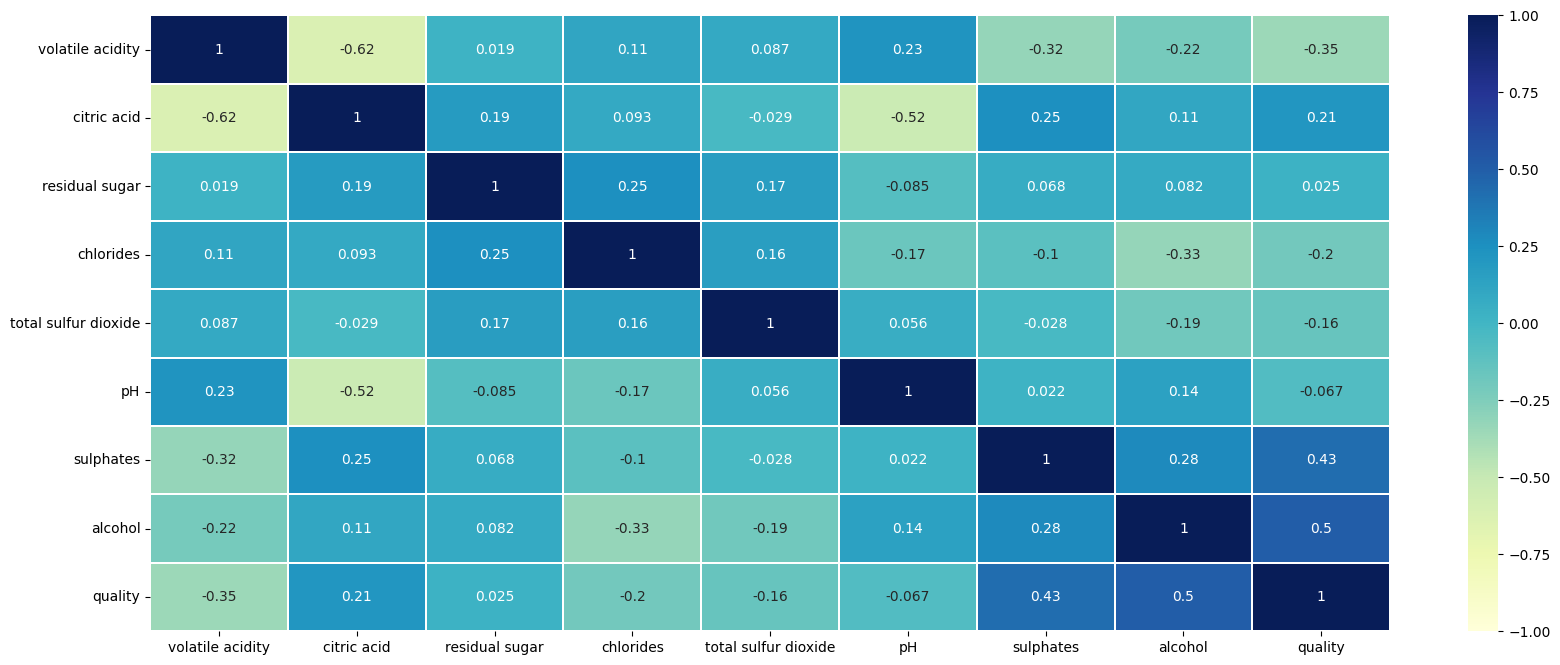

In [ ]:
# feature reduction
# and check the model is improving

corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-1, vmax=1, annot=True, linewidth=0.2, cmap="YlGnBu")

In [ ]:
data.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# drope the column with low negative correlation
data.drop(["citric acid"],axis=1, inplace=True)

In [ ]:
y= data["quality"]
x= data.drop("quality",axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.2)
lr= linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)

print("MSE IS:", mean_squared_error(y_test,prediction))
print("R squared value is:", r2_score(y_test,prediction))

MSE IS: 0.35205636481818675
R squared value is: 0.3467641941255306
